In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
  
# loading the archive.zip and creating a zip object
with ZipFile("/content/archive.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(
        path="/content/")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use("ggplot")

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
train_df=pd.read_csv("/content/twitter_training.csv",names=['Tweet_ID','entity','sentiment','Tweet'])
train_df.head()

,Tweet_ID,entity,sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
test_df=pd.read_csv("/content/twitter_validation.csv",names=['entity','sentiment','Tweet'])
test_df.head()

,entity,sentiment,Tweet
3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4433,Google,Neutral,Now the President is slapping Americans in the...


Text(0.5, 1.0, 'Sentimental Analysis')

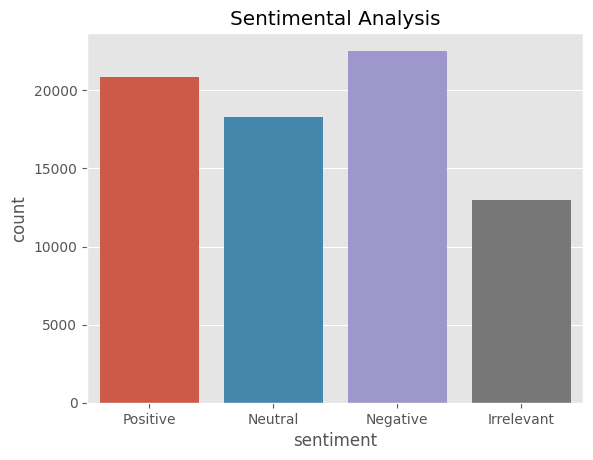

In [ ]:
sns.countplot(x="sentiment", data=train_df)
plt.title("Sentimental Analysis")

In [ ]:
import numpy as np

In [ ]:
train_df = train_df.replace(np.nan, '')

In [ ]:
def data_preprocessing(text):
  text=text.lower()
  text=re.sub("<br />", "", text)
  text=re.sub(r'https\S+|www\S+|http\S+', "", text, flags=re.MULTILINE)
  text=re.sub(r"\@w+|\#", "", text)
  text=re.sub(r"[^\w\s]", "", text)
  text_tokens=word_tokenize(text)
  filtered_text=[w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [ ]:
train_df.Tweet=train_df["Tweet"].apply(data_preprocessing)

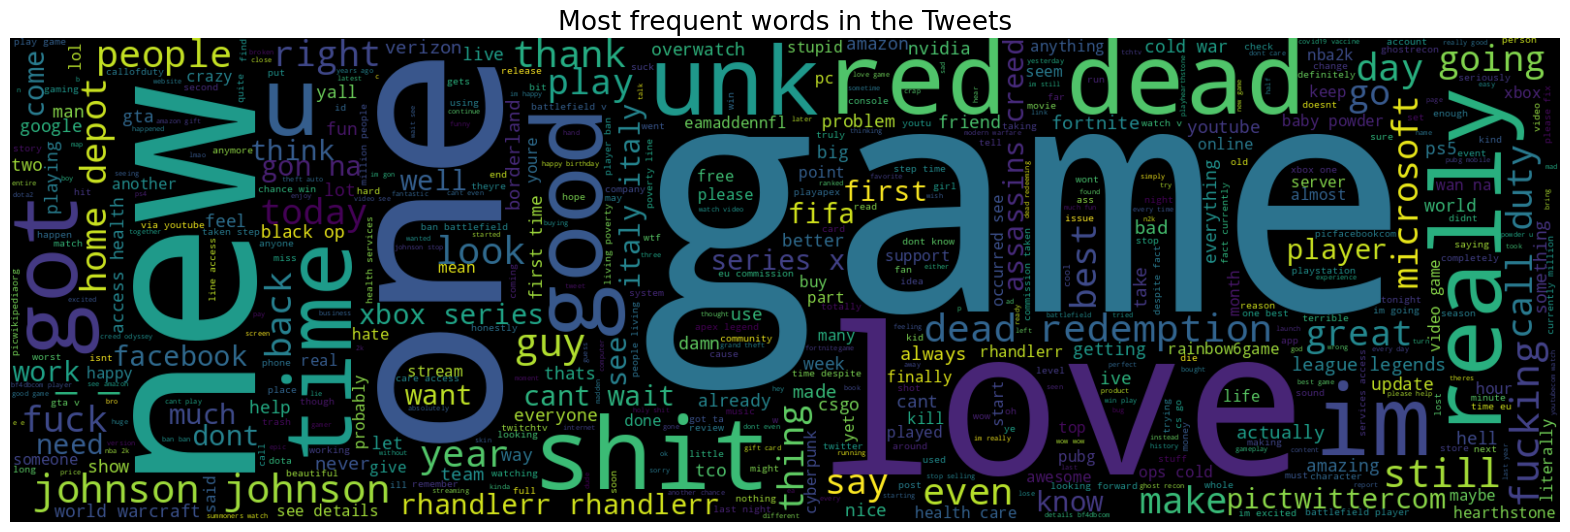

In [ ]:
text=" ".join([word for word in train_df["Tweet"]])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud=WordCloud(max_words=500, width=1600, height=500).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most frequent words in the Tweets", fontsize=19)
plt.show()

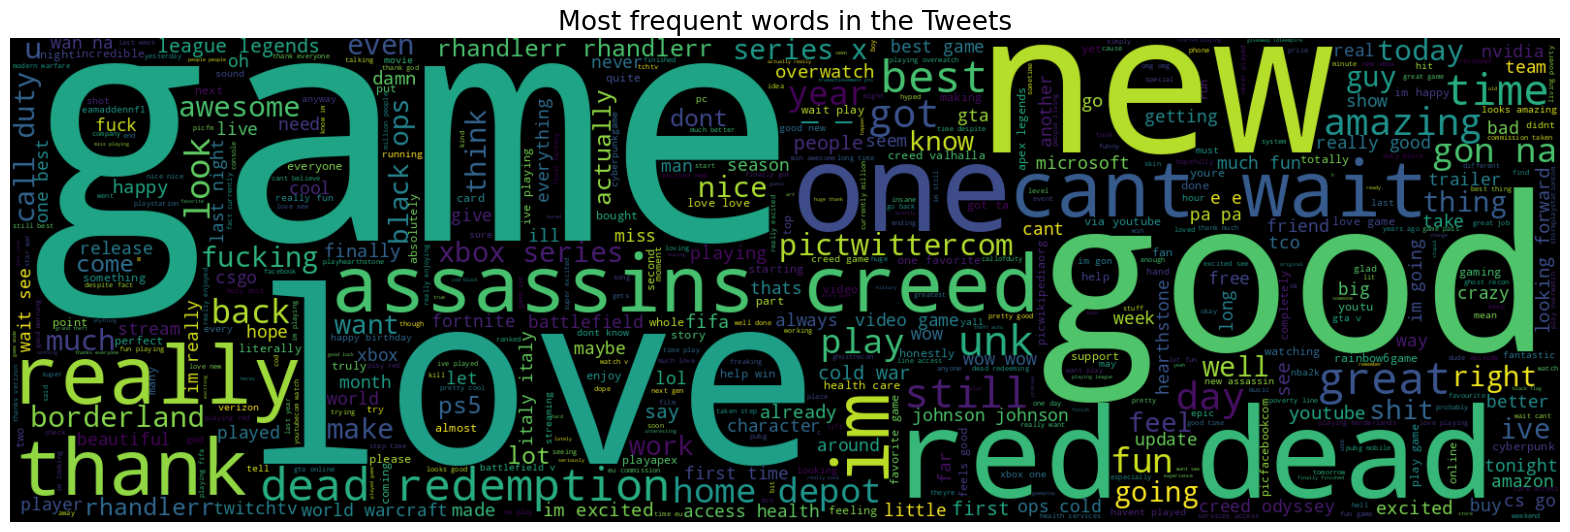

In [ ]:
pos_tweet = train_df[train_df.sentiment =='Positive']
text=" ".join([word for word in pos_tweet["Tweet"]])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud=WordCloud(max_words=500, width=1600, height=500).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most frequent words in the Tweets", fontsize=19)
plt.show()

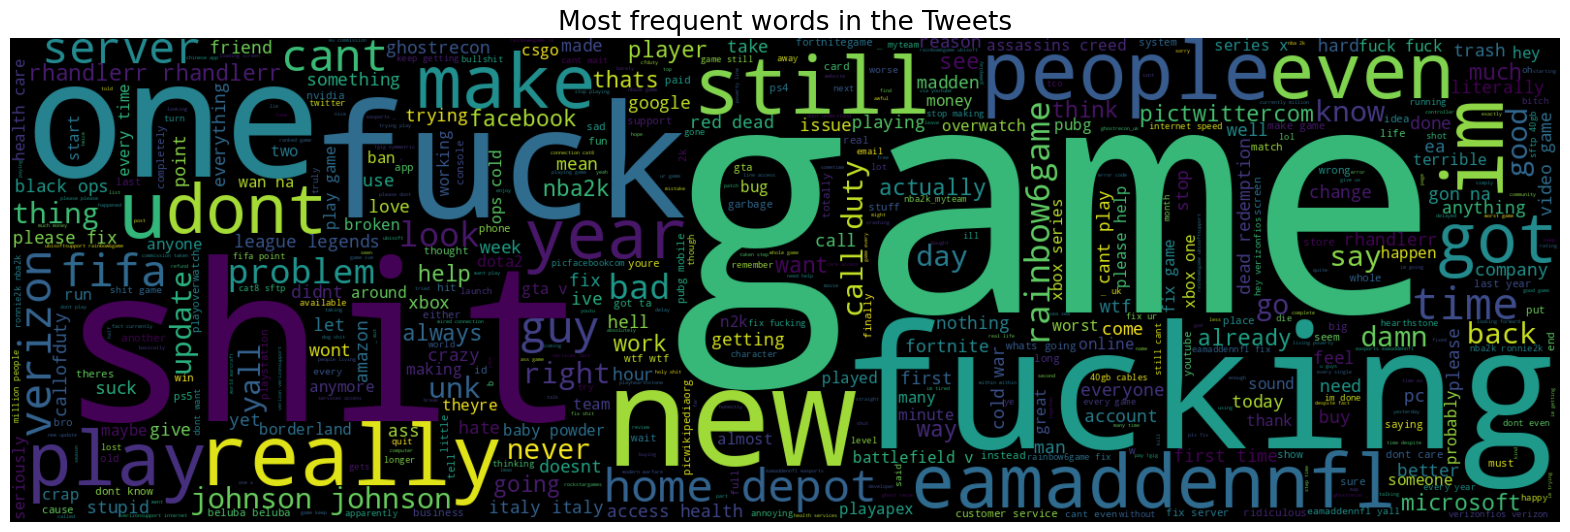

In [ ]:
neg_tweet = train_df[train_df.sentiment =='Negative']
text=" ".join([word for word in neg_tweet["Tweet"]])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud=WordCloud(max_words=500, width=1600, height=500).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most frequent words in the Tweets", fontsize=19)
plt.show()

In [ ]:
train_df[['entity','Tweet']]

,entity,Tweet
0,Borderlands,im getting borderlands murder
1,Borderlands,coming borders kill
2,Borderlands,im getting borderlands kill
3,Borderlands,im coming borderlands murder
4,Borderlands,im getting borderlands 2 murder
...,...,...
74677,Nvidia,realized windows partition mac like 6 years be...
74678,Nvidia,realized mac window partition 6 years behind n...
74679,Nvidia,realized windows partition mac 6 years behind ...
74680,Nvidia,realized windows partition mac like 6 years be...


In [ ]:

X = train_df[['entity','Tweet']]
Y = train_df["sentiment"]

In [ ]:
vect=TfidfVectorizer()
tweet_vec=vect.fit_transform(X['Tweet'])

In [ ]:
tweet_vec.shape

(74682, 40134)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(tweet_vec, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred= logreg.predict(x_test)
logreg_acc= accuracy_score(logreg_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 76.70%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))


[[2503  407  458  502]
 [ 172 5564  583  420]
 [ 208  574 4081  561]
 [ 191  467  677 5037]]


              precision    recall  f1-score   support

  Irrelevant       0.81      0.65      0.72      3870
    Negative       0.79      0.83      0.81      6739
     Neutral       0.70      0.75      0.73      5424
    Positive       0.77      0.79      0.78      6372

    accuracy                           0.77     22405
   macro avg       0.77      0.75      0.76     22405
weighted avg       0.77      0.77      0.77     22405



In [ ]:
mnb= MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred= mnb.predict(x_test)
mnb_acc= accuracy_score(mnb_pred, y_test)
print("Test Accuracy: {:.2f}%".format(mnb_acc*100))

Test Accuracy: 71.15%


In [ ]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[1483 1242  248  897]
 [  15 6125  169  430]
 [  30 1393 3143  858]
 [  14  948  219 5191]]


              precision    recall  f1-score   support

  Irrelevant       0.96      0.38      0.55      3870
    Negative       0.63      0.91      0.74      6739
     Neutral       0.83      0.58      0.68      5424
    Positive       0.70      0.81      0.76      6372

    accuracy                           0.71     22405
   macro avg       0.78      0.67      0.68     22405
weighted avg       0.76      0.71      0.70     22405



In [ ]:
svc= LinearSVC()
svc.fit(x_train, y_train)
svc_pred= svc.predict(x_test)
svc_acc= accuracy_score(svc_pred, y_test)
print("Test Accuracy: {:.2f}%".format(svc_acc*100))

Test Accuracy: 84.40%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[2988  246  313  323]
 [ 106 5886  428  319]
 [ 118  348 4608  350]
 [ 163  302  479 5428]]


              precision    recall  f1-score   support

  Irrelevant       0.89      0.77      0.82      3870
    Negative       0.87      0.87      0.87      6739
     Neutral       0.79      0.85      0.82      5424
    Positive       0.85      0.85      0.85      6372

    accuracy                           0.84     22405
   macro avg       0.85      0.84      0.84     22405
weighted avg       0.85      0.84      0.84     22405

